# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.145  1  0.218 0.641 0.001   
                             age        0.078  1  0.118 0.732 0.001   
                             Kiel       2.240  1  3.378 0.068 0.017   
                             Magdeburg  6.200  1  9.347 0.003 0.047   
                             Sweden     9.734  1 14.676 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.457  1  0.497 0.482 0.003   
                             age        2.349  1  2.556 0.112 0.013   
                             Kiel       0.015  1  0.016 0.900 0.000   
                             Magdeburg  2.966  1  3.228 0.074 0.017   
                             Sweden    10.286  1 11.195 0.001 0.055   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.193  0.766    False  
                             age               0.136  0.831    False  
                             Kiel              1.170  0.154    False  
                             Magdeburg         2.593  0.011     True  
                             Sweden            3.762  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.317  0.634    False  
                             age               0.953  0.227    False  
                             Kiel              0.046  0.944    False  
                             Magdeburg         1.131  0.165    False  
                             Sweden            3.005  0.005     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.690  1  4.214 0.041 0.022   
                             age        0.025  1  0.154 0.695 0.001   
                             Kiel       0.479  1  2.922 0.089 0.015   
                             Magdeburg  0.957  1  5.840 0.017 0.030   
                             Sweden     2.528  1 15.435 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.235  1  0.660 0.418 0.003   
                             age        2.152  1  1.151 0.285 0.006   
                             Kiel       7.682  1  4.108 0.044 0.021   
                             Magdeburg 19.322  1 10.332 0.002 0.051   
                             Sweden     0.202  1  0.108 0.742 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.382  0.098    False  
                             age               0.158  0.797    False  
                             Kiel              1.051  0.179    False  
                             Magdeburg         1.780  0.047     True  
                             Sweden            3.923  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.379  0.564    False  
                             age               0.546  0.434    False  
                             Kiel              1.356  0.103    False  
                             Magdeburg         2.814  0.006     True  
                             Sweden            0.129  0.832    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.641         0.193  0.766    False   
                             age       0.732         0.136  0.831    False   
                             Kiel      0.068         1.170  0.154    False   
                             Magdeburg 0.003         2.593  0.011     True   
                             Sweden    0.000         3.762  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.482         0.317  0.634    False   
                             age       0.112         0.953  0.227    False   
                             Kiel      0.900         0.046  0.944    False   
                             Magdeburg 0.074         1.131  0.165    False   
                             Sweden    0.001         3.005  0.005     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.041         1.382  0.098    False  
                             age       0.695         0.158  0.797    False  
                             Kiel      0.089         1.051  0.179    False  
                             Magdeburg 0.017         1.780  0.047     True  
                             Sweden    0.000         3.923  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.418         0.379  0.564    False  
                             age       0.285         0.546  0.434    False  
                             Kiel      0.044         1.356  0.103    False  
                             Magdeburg 0.002         2.814  0.006     True  
                             Sweden    0.742         0.129  0.832    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.480     0.337     0.247         2.735     0.314
std       0.303         5.314     0.331     0.300         5.151     0.328
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.004         0.338     0.015     0.002         0.361     0.008
50%       0.120         0.920     0.240     0.091         1.043     0.181
75%       0.459         2.433     0.613     0.436         2.707     0.581
max       0.999       144.193     0.999     0.999        85.384     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.641         0.193   
A0A024R0T9;K7ER74;P02655                           AD     0.038         1.421   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.092         1.037   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.427         0.370   
A0A075B6H7                                         AD     0.112         0.950   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.075         1.126   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.289         0.539   
S4R3U6                                             AD     0.482         0.317   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.766    False   
A0A024R0T9;K7ER74;P02655                           AD      0.098    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.196    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.585    False   
A0A075B6H7                                         AD      0.228    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.167    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.449    False   
S4R3U6                                             AD      0.634    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.041         1.382   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.512   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.216         0.666   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.310         0.509   
A0A075B6H7                                         AD     0.046         1.341   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.072         1.143   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.621         0.207   
S4R3U6                                             AD     0.418         0.379   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.098    False  
A0A024R0T9;K7ER74;P02655                           AD      0.078    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.356    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.461    False  
A0A075B6H7                                         AD      0.105    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.408     0.334     0.249         1.492     0.323
std       0.294         1.634     0.318     0.289         1.800     0.315
min       0.000         0.003     0.000     0.000         0.002     0.000
25%       0.011         0.365     0.037     0.010         0.364     0.030
50%       0.113         0.946     0.230     0.113         0.946     0.217
75%       0.431         1.951     0.589     0.433         2.017     0.579
max       0.994        23.684     0.995     0.996        26.453     0.997

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1027,997


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.641         0.193  0.766   
A0A024R0T9;K7ER74;P02655                           0.038         1.421  0.098   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.092         1.037  0.196   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.427         0.370  0.585   
A0A075B6H7                                         0.112         0.950  0.228   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.075         1.126  0.167   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.289         0.539  0.449   
S4R3U6                                             0.482         0.317  0.634   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.041   
A0A024R0T9;K7ER74;P02655                              False 0.031   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.216   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.310   
A0A075B6H7                                            False 0.046   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.072   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.621   
S4R3U6                                                False 0.418   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.382  0.098   
A0A024R0T9;K7ER74;P02655                                   1.512  0.078   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.666  0.356   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.509  0.461   
A0A075B6H7                                                 1.341  0.105   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.143  0.151   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.207  0.741   
S4R3U6                                                     0.379  0.564   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    962
PI (yes) - QRILC (yes)   359
PI (no)  - QRILC (yes)    65
PI (yes) - QRILC (no)     35
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.022         1.648  0.065    False   
A0A075B6S5                            0.373         0.429  0.536    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.048         1.315  0.119    False   
A0A087WWT2;Q9NPD7                     0.038         1.418  0.099    False   
A0A087WXB8;Q9Y274                     0.011         1.967  0.036     True   
...                                     ...           ...    ...      ...   
Q9NS84                                0.067         1.174  0.153    False   
Q9NYX4                                0.057         1.247  0.134    False   
Q9UJ14                                0.025         1.597  0.072    False   
Q9UKB5                                0.006         2.218  0.022     True   
Q9UQ52                                0.050         1.299  0.122    False   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.002         2.715  0.008     True   
A0A075B6S5                            0.005         2.296  0.017     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.013         1.888  0.038     True   
A0A087WWT2;Q9NPD7                     0.008         2.108  0.025     True   
A0A087WXB8;Q9Y274                     0.214         0.669  0.354    False   
...                                     ...           ...    ...      ...   
Q9NS84                                0.002         2.776  0.007     True   
Q9NYX4                                0.009         2.057  0.028     True   
Q9UJ14                                0.012         1.925  0.036     True   
Q9UKB5                                0.048         1.321  0.109    False   
Q9UQ52                                0.009         2.050  0.028     True   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6I0                                  194  
A0A075B6S5                                  129  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
A0A087WXB8;Q9Y274                            89  
...                                         ...  
Q9NS84                                       83  
Q9NYX4                                      195  
Q9UJ14                                      169  
Q9UKB5                                      148  
Q9UQ52                                      188  

[100 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.766,0.098,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.098,0.078,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.196,0.356,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.585,0.461,196,PI (no) - QRILC (no)
A0A075B6H7,0.228,0.105,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.315,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.167,0.151,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.952,0.012,86,PI (no) - QRILC (yes),0.940
P37802;P37802-2;X6RJP6,0.004,0.635,110,PI (yes) - QRILC (no),0.631
P35754,0.030,0.635,143,PI (yes) - QRILC (no),0.604
A0A075B6S5,0.536,0.017,129,PI (no) - QRILC (yes),0.518
O75083,0.048,0.541,102,PI (yes) - QRILC (no),0.493
...,...,...,...,...,...
E9PK25;G3V1A4;P23528,0.058,0.043,114,PI (no) - QRILC (yes),0.015
P05160,0.050,0.040,154,PI (no) - QRILC (yes),0.010
Q16706,0.056,0.047,195,PI (no) - QRILC (yes),0.009


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


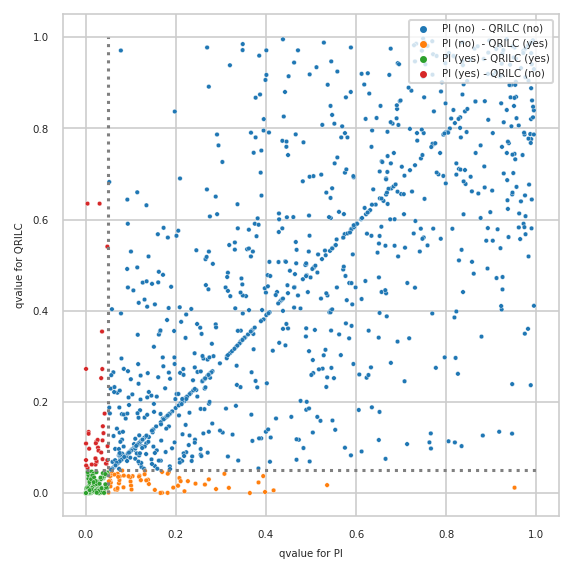

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


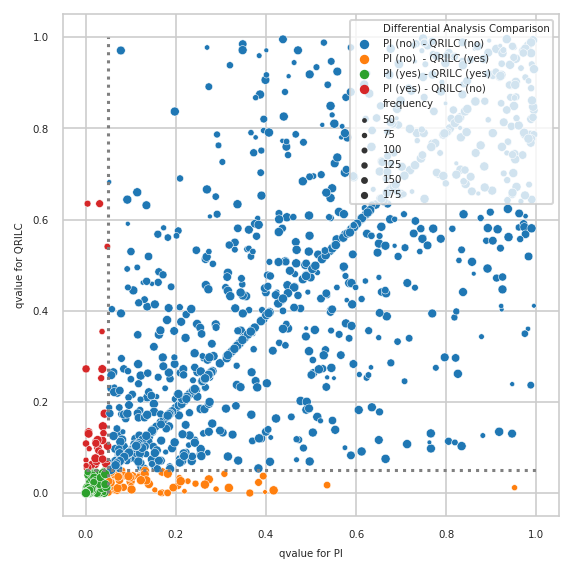

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out